In [21]:
#데이터 처리 및 조작
import pandas as pd #데이터프레임(DataFrame) 형태로 데이터를 다룰 때 사용
#데이터 분할 및 모델 평가
from sklearn.model_selection import train_test_split #데이터를 훈련 세트와 테스트 세트로 분할
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # 모델 평가 지표
#머신러닝 모델
from sklearn.ensemble import RandomForestClassifier #랜덤 포레스트 분류 알고리즘
# 데이터 불균형 처리
from imblearn.over_sampling import SMOTE # SMOTE(Synthetic Minority Oversampling Technique)로 데이터 불균형 해결
#데이터 시각화
import matplotlib.pyplot as plt # 데이터 시각화를 위한 기본 라이브러리
import seaborn as sns # 고급 데이터 시각화를 위한 라이브러리
#데이터 전처리
from sklearn.preprocessing import LabelEncoder # 범주형 데이터를 숫자로 변환 (레이블 인코딩)



In [22]:
#1. 데이터 로드
#CSV 파일을 pandas 데이터프레임으로 로드
data = pd.read_csv('./dataset/heart_disease.csv')


In [23]:
#데이터 샘플 확인
print("데이터 샘플:")
print(data.head()) # 데이터 상위 5개 행 출력

데이터 샘플:
    Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes       No  24.991591                 Yes  ...   
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                   No   

In [24]:
#데이터 기본 정보 확인
print("\n데이터 정보:")
print(data.info()) # 각 열의 데이터 유형 및 결측치 확인


데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consu

In [48]:
#2. 결측치 및 중복값 확인

# 1. 결측치 통계
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
print("결측치 통계:")
print(pd.DataFrame({"Missing values:": missing_values, "Missing Percentage (%)": missing_percentage}))

#2. 중복값 통계
duplicate_rows = data.duplicated().sum()
duplicate_percentages = (duplicate_rows / len(data)) * 100
print("\n중복값 통계:")
print(f"중복된 행 개수: {duplicate_rows}")
print(f"중복된 행 비율: {duplicate_percentages:.2f}%")

#결측치 제거(필요시)
data = data.dropna()
#중복값 제거
data = data.drop_duplicates()

결측치 통계:
                      Missing values:  Missing Percentage (%)
Age                                 0                     0.0
Gender                              0                     0.0
Blood Pressure                      0                     0.0
Cholesterol Level                   0                     0.0
Exercise Habits                     0                     0.0
Smoking                             0                     0.0
Family Heart Disease                0                     0.0
Diabetes                            0                     0.0
BMI                                 0                     0.0
High Blood Pressure                 0                     0.0
Low HDL Cholesterol                 0                     0.0
High LDL Cholesterol                0                     0.0
Alcohol Consumption                 0                     0.0
Stress Level                        0                     0.0
Sleep Hours                         0                     0.0


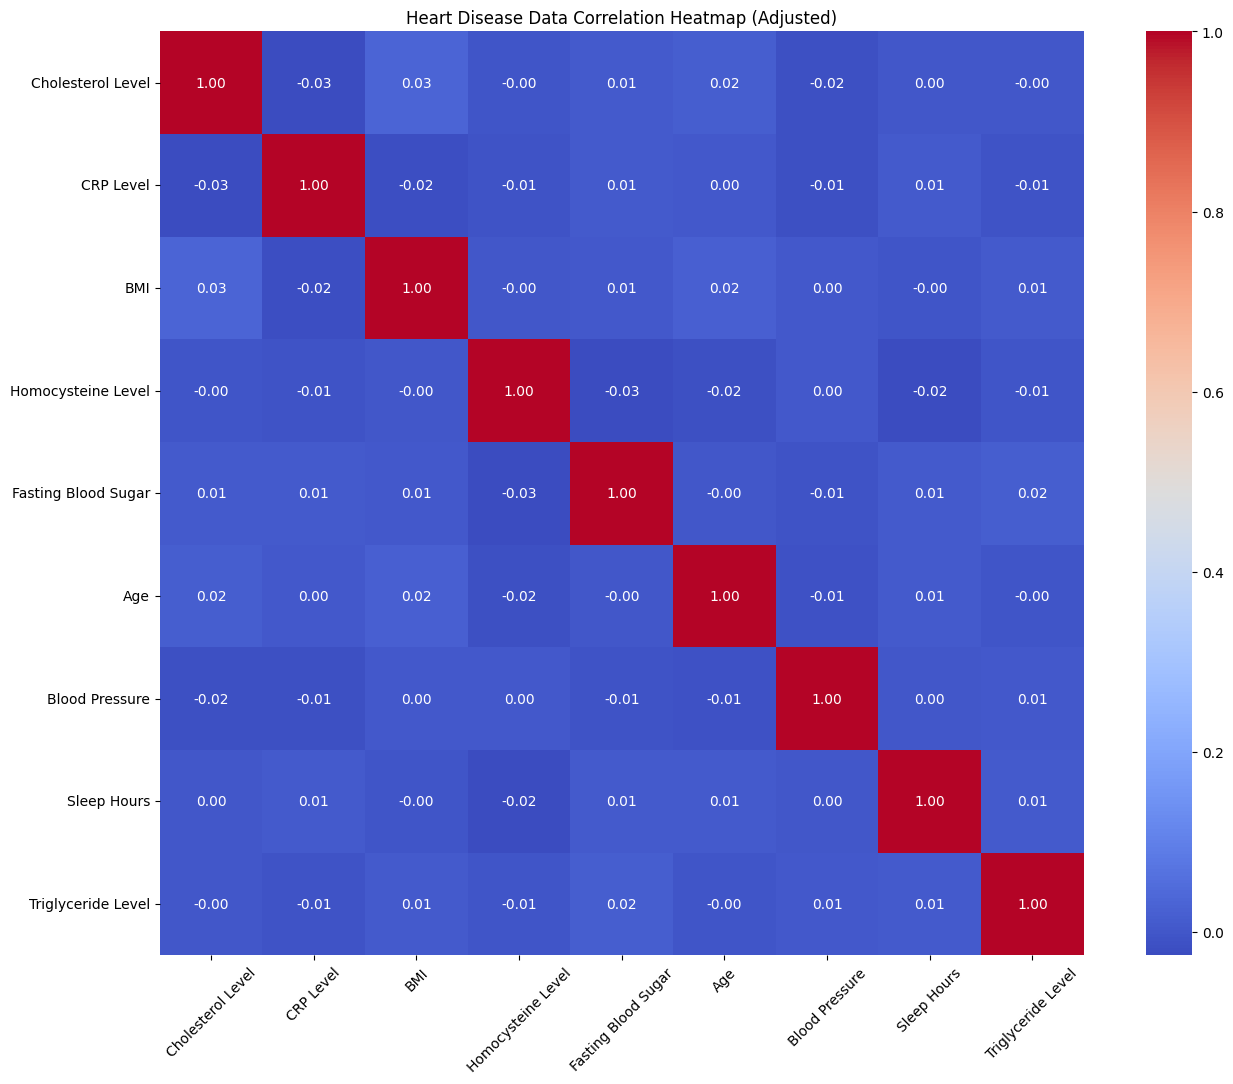

In [47]:
# 3. 데이터 전처리
# 수치형 데이터만 추출 (상관관계 분석을 위해)
numeric_data = data.select_dtypes(include=['number'])

# 주요 변수만 선택 (예: 상위 10개의 변수)
important_columns = numeric_data.corr().abs().sum().sort_values(ascending=False).index[:10]
reduced_data = numeric_data[important_columns]

# 상관관계 계산
correlation_matrix_reduced = reduced_data.corr()

# 히트맵 그리기
plt.figure(figsize=(16, 12))  # 히트맵 크기 확장
sns.heatmap(correlation_matrix_reduced, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.xticks(rotation=45)  # X축 레이블 45도 회전
plt.yticks(rotation=0)   # Y축 레이블 수평 유지
plt.title("Heart Disease Data Correlation Heatmap (Adjusted)")
plt.show()

In [ ]:
#3. 데이터 전처리

결측치 통계:
                      Missing values:  Missing Percentage (%)
Age                                 0                     0.0
Gender                              0                     0.0
Blood Pressure                      0                     0.0
Cholesterol Level                   0                     0.0
Exercise Habits                     0                     0.0
Smoking                             0                     0.0
Family Heart Disease                0                     0.0
Diabetes                            0                     0.0
BMI                                 0                     0.0
High Blood Pressure                 0                     0.0
Low HDL Cholesterol                 0                     0.0
High LDL Cholesterol                0                     0.0
Alcohol Consumption                 0                     0.0
Stress Level                        0                     0.0
Sleep Hours                         0                     0.0
